In [1]:
Base.chr2ind(m::IJulia.Msg, str::String, ic::Int64) = Base.chr2ind(m, str, Int32(ic))

In [2]:
using DynamicalBilliards
DynamicalBilliards.enableplotting()

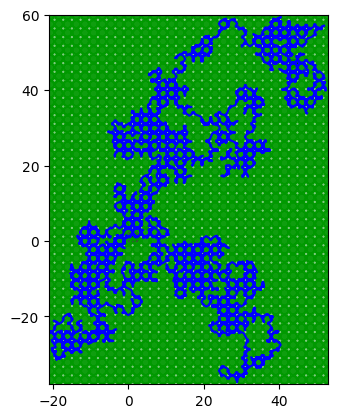

(PyObject <matplotlib.collections.PathCollection object at 0xeeedfecc>, PyObject <matplotlib.quiver.Quiver object at 0xcebf4b2c>)

In [5]:
r = 2.3
a = 1.0
b = 0.5

bt = billiard_rectangle(r, r; setting = "periodic")
d1 = Disk([0., 0.], a)
d2 = Disk([r, 0.], a)
d3 = Disk([0., r], a)
d4 = Disk([r, r], a)
dc = Disk([r/2, r/2], b)

push!(bt, dc, d1,d2,d3,d4)  #Billiard_table

p = randominside(bt)

plot_billiard(bt)
plot_particle(p)

m = eye(4)
t = 10000.0

ts, pos, vel, exps = evolve!(p, bt, t, m)

xt = [pos[i][1] for i in 1:length(pos)]
yt = [pos[i][2] for i in 1:length(pos)]

plot_billiard(bt, xt, yt)
plot_particle(p)

In [6]:
exps

4-element Array{Float64,1}:
  0.402724  
  1.40256e-5
 -7.05187e-5
 -0.402668  